In [20]:
import qiskit as qk
import math as m
from qiskit import IBMQ,Aer
qk.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}

In [6]:
IBMQ.save_account('')

configrc.store_credentials:WARNING:2020-10-01 23:36:47,784: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()



C:\Users\Василий\AppData\Roaming\Python\Python37\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:

my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
backend  = my_provider.get_backend('ibmq_qasm_simulator')

$Задание~1:~измерить ~фазу~ \phi ~состояния~ |\psi>=sin\frac{\theta}{2}|0>+e^{i\phi}cos\frac{\theta}{2}|1>$. Для этого применим преобразование Адамара к нашему состоянию. Получим:

\begin{equation}
H|\psi>=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}
\begin{pmatrix}
sin\frac{\theta}{2}\\
e^{i\phi}cos\frac{\theta}{2}\\
\end{pmatrix}=\frac{1}{\sqrt{2}}(sin\frac{\theta}{2}+e^{i\phi}cos\frac{\theta}{2})|0>+\frac{1}{\sqrt{2}}(sin\frac{\theta}{2}-e^{i\phi}cos\frac{\theta}{2})|1>
\end{equation}
$Пусть~ мы~ измерили~ вероятность~ a^2 нахождения~ системы~ в~ состоянии~ |0> ~. Тогда:
2a^2=|sin\frac{\theta}{2}+e^{i\phi}cos\frac{\theta}{2}|^2=(cos\phi cos\frac{\theta}{2}+sin\frac{\theta}{2})^2+(sin\phi cos\frac{\theta}{2})^2=1+2cos\frac{\theta}{2} sin\frac{\theta}{2} cos\phi=1+sin\theta cos\phi$
Отсюда получаем $cos\phi=\frac{2a^2-1}{sin\theta}$

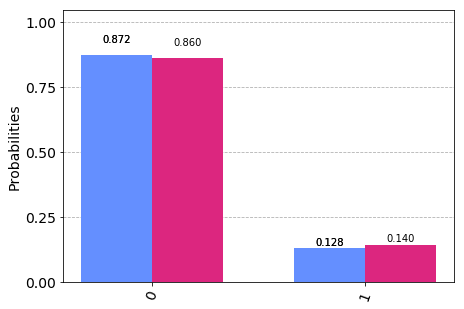

In [117]:
qreg_q = qk.QuantumRegister(1, 'q')
creg_c = qk.ClassicalRegister(1, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

#Preparation
theta=0.92;
phi=0.3514;
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(theta, qreg_q[0])
circuit.h(qreg_q[0])
circuit.s(qreg_q[0])
circuit.rz(phi, qreg_q[0])
circuit.h(qreg_q[0])

#Measurement
measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()
res=resultExpMulty.get_counts(testZ)

from qiskit.tools.visualization import plot_histogram
plot_histogram([res,resultSimMulty.get_counts(testZ)])

In [118]:
#Измерение фазы:
m.acos((2*res['0']/1024-1)/m.sin(theta))

0.3616391482932495

$Задание ~2:$ приготовить состояние $ |\psi>=sin\frac{\theta}{2}|0>+e^{i\phi}cos\frac{\theta}{2}|1>$
Состояние удобно рассматривать как единичный вектор, конец которого лежит на сфере Блоха. Чтобы из состояния |0> получить произвольное, нужно осуществить два последовательных поворота: на азимутальный угол вокруг оси x или y и на полярный вокруг оси z. Чтобы в результате первого поворота получить состояние с нулевым полярным углом, осуществим поворот вокруг оси y на угол $\theta/2$, осталось лишь выразить его через имеющиеся гейты. Через поворот покруг оси z, преобразование Адамара и корень из Z он выразится как: $Ry(\theta)=S H Rz(\theta) H S^\dagger$, а итоговая схема запишется как: $CG(\theta,\phi)=Rz(\phi)S H Rz(\theta) H S^\dagger$

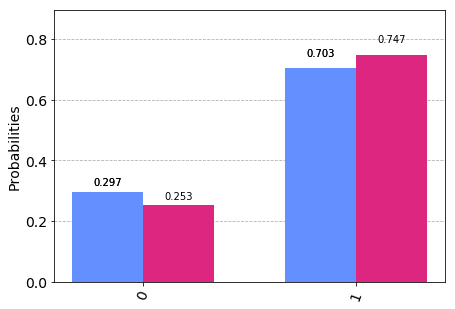

In [113]:
qreg_q = qk.QuantumRegister(1, 'q')
creg_c = qk.ClassicalRegister(1, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
circuit.rz(2*math.pi/3, qreg_q[0])
circuit.h(qreg_q[0])
circuit.s(qreg_q[0])
circuit.rz(2*math.pi/3, qreg_q[0])

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)])

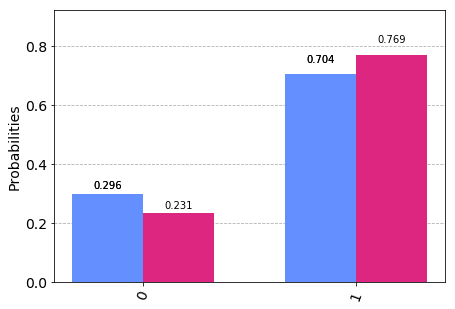

In [116]:
qreg_q = qk.QuantumRegister(1, 'q')
creg_c = qk.ClassicalRegister(1, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.u3(2*math.pi/3, 2*math.pi/3, 0, qreg_q[0])

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)])

Задание 3: доказать равенства
а) H X H = Z
\begin{equation}
\frac{1}{2}
\begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}=
\frac{1}{2}\begin{pmatrix}
1 & 1\\
-1 & 1\\
\end{pmatrix}
\begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix}
\end{equation}
б) СZ=SWAP CZ SWAP
\begin{equation}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}
\end{equation}
с) $(H\otimes H)CX(H\otimes H)= SWAP\cdot CX\cdot SWAP$
\begin{equation}
\frac{1}{4}\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1\\
\end{pmatrix}=
\frac{1}{4}\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & -1 & -1 & 1\\
1 & 1 & -1 & -1\\
1 & -1 & 1 & -1\\
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{pmatrix}
\end{equation}
\begin{equation}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\end{equation}
d) $C(e^{i\alpha})=(U(\alpha)\otimes I)$
\begin{equation}
\begin{pmatrix}
1 & 0\\
0 & e^{i\alpha}\\
\end{pmatrix}\otimes
\begin{pmatrix}
1 & 0\\
0 & 1\\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\alpha} & 0\\
0 & 0 & 0 & e^{i\alpha}\\
\end{pmatrix}
\end{equation}

Задание 4: выяснить, спутанные ли состояния

b) $\frac{1}{2}(|00\rangle-i|01\rangle+i|10\rangle+|11\rangle)=\frac{1}{2}(|0\rangle(|0\rangle-i|1\rangle)+i|1\rangle(|0\rangle-i|1\rangle)=\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)\frac{1}{\sqrt{2}}(|0\rangle-i|0\rangle)$
Введём новые ортогональные состояния для обоих кубитов: $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle),~|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$
Тогда исходное состояние запишется просто как $|+\rangle|-\rangle=|+-\rangle$, отсюда видно, что оно сепарабельно.

c) $\frac{1}{2}(|00\rangle-|01\rangle+|10\rangle+|11\rangle)=\frac{1}{2}(|0\rangle(|0\rangle-|1\rangle)+|1\rangle(|0\rangle+|1\rangle))$
Введём новые ортогональные состояния для второго кубита: $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle),~|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$.
Тогда исходное состояние запишется как $\frac{1}{\sqrt{2}}(|0-\rangle+|1+\rangle)$, отсюда видно, что состояние спутанное, представить его в виде тензорного произведения состояний двух кубитов нельзя.

a) $\frac{2}{3}|00\rangle+\frac{1}{3}|01\rangle-\frac{2}{3}|11\rangle$

Рассмотрим задачу в более общем виде. Состояние 2 кубитов в общем виде можно представить в виде произведения вектора-строки на матрицу на вектор-столбец.
\begin{equation}
\begin{pmatrix}
|0\rangle & |1\rangle\\
\end{pmatrix}
\begin{pmatrix}
a & b\\
c & d\\
\end{pmatrix}
\begin{pmatrix}
|0\rangle\\
|1\rangle\\
\end{pmatrix}=a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle
\end{equation}

Введём новые состояния, переход к которым осуществим при помощи двух разных унитарных матриц U и V:
\begin{equation}
Кубит~№1: \begin{pmatrix}
|0\rangle\\
|1\rangle\\
\end{pmatrix}=V
\begin{pmatrix}
|\psi\rangle\\
|\phi\rangle\\
\end{pmatrix}=
\begin{pmatrix}
cos\alpha & -sin\alpha\\
sin\alpha & cos\alpha\\
\end{pmatrix}
\begin{pmatrix}
|\psi\rangle\\
|\phi\rangle\\
\end{pmatrix}~~
Кубит~№2: \begin{pmatrix}
|0\rangle\\
|1\rangle\\
\end{pmatrix}=U
\begin{pmatrix}
|\chi\rangle\\
|\eta\rangle\\
\end{pmatrix}=
\begin{pmatrix}
cos\beta & -sin\beta\\
sin\beta & cos\beta\\
\end{pmatrix}
\begin{pmatrix}
|\chi\rangle\\
|\eta\rangle\\
\end{pmatrix}
\end{equation}

В новом базисе матрица A будет иметь вид $V^\dagger A U$. Попробуем придать этой матрице диагональный вид, т.е. потребуем зануления недиагональных элементов. Если это удастся сделать -- наше состояние можно представить в виде суперпозиции двух двухкубитных состояний. Если в таком базисе занулится ещё и один диагональный элемент, останется только одно двухкубитное состояние, это значит, что состояние является сепарабельным. Имеем систему уравнений:
\begin{equation}
\begin{cases}
asin\beta cos\alpha-bcos\beta cos\alpha+csin\beta sin\alpha-d cos\beta sin\alpha=0\\
acos\beta sin\alpha+bsin\beta sin\alpha-ccos\beta cos\alpha-d sin\beta cos\alpha=0
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
2tg\beta-1+2tg\alpha=0\\
2tg\alpha+tg\beta tg\alpha+2tg\beta=0
\end{cases}
\end{equation}

Решая уравнения относительно $x=tg\alpha,~y=tg\beta$, получим $x=\frac{1}{4}(-1+\sqrt{17}),~y=\frac{1}{4}(-1-\sqrt{17})$ и углы поворота базиса. Матрица A в новом базисе имеет вид:

\begin{equation}
\begin{pmatrix}
-\frac{1}{6}+\frac{\sqrt{17}}{6} & 0\\
0 & -\frac{1}{6}-\frac{\sqrt{17}}{6}\\
\end{pmatrix}
\end{equation}

Как можно видеть, диагональные элементы ненулевые, состояние несепарабельное.

Задание 5: написать схему для приготовления произвольного состояния двух кубитов.

Исходим из того, что система изначально находится в состоянии |00>. Матрицу перехода хотим представить в виде последовательности уже известных гейтов. Конечное состояние задаётся при помощи матрицы A, как в задаче 5а. Допустим, что при помощи сингулярного разложения мы смогли привести матрицу к диагональному виду, тогда можем представить матрицу перехода в следующем виде:

\begin{equation}
T=(B\otimes I)CNOT_2^1(U\otimes V)
\end{equation}

Остался лишь вопрос, как составить матрицу B. Она должна быть такой, что $B|0\rangle=b_1|0\rangle+b_2|1\rangle$, где $b_1,b_2$ -- сингулярные числа матрицы A. Это даст нам два элемента матрицы B, остальные допишем из условия унитарности B. Что касается сингулярного разложения, один из вариантов его реализации был представлен в задаче 5а.

a) \begin{equation}
A=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0\\
0 & \pm 1\\
\end{pmatrix}
\end{equation}

Матрица уже приведена к диагональному виду, поэтому U=V=I. Матрицу B составляем в соответствии с соображениями, приведенными выше.

\begin{equation}
B=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & \mp 1\\
\pm 1 & 1\\
\end{pmatrix}=Ry(\pi/2)
\end{equation}


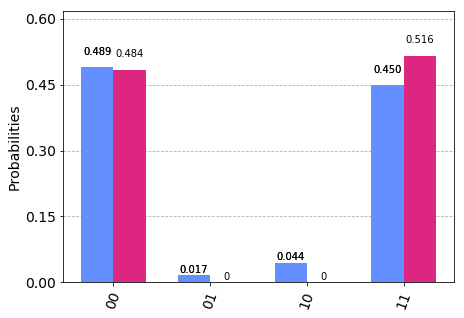

In [24]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.ry(m.pi/2, qreg_q[0])
#for -state
#circuit.ry(-m.pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)])

5b)

\begin{equation}
A=\frac{1}{\sqrt{2}}\begin{pmatrix}
0 & 1\\
\pm 1 & 0\\
\end{pmatrix}
\end{equation}

Диагонализуется эта матрица в базисе, соответствующему $U=\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}=NOT$, V=I и имеет вид $A'=\begin{pmatrix}
1 & 0\\
0 & \pm 1 \\
\end{pmatrix}$

Т.е. после применения $U\otimes V$ задача становится идентичной задаче 6a.



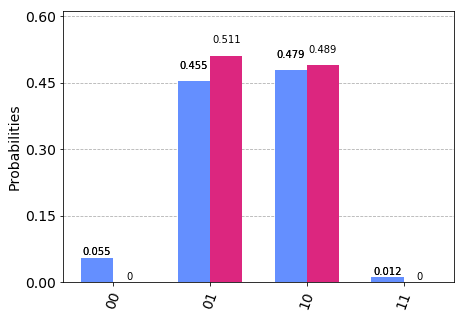

In [25]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.ry(m.pi/2, qreg_q[0])
#for -state
#circuit.ry(-m.pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[0])

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)])

5c)

\begin{equation}
A=\frac{1}{\sqrt{12}}\begin{pmatrix}
3 & 1\\
1 & -1\\
\end{pmatrix}
\end{equation}

Здесь придётся действовать в лоб, как в задаче 4a. Однако, всё-таки можно немного упростить решение. Заметим, что если b=c, то система допускает решение x=y, то есть сингулярное разложение выродится в простую диагонализацию, т.е. U=V. Получаем U=V=$R_y(\theta),~\theta=atan(\sqrt{5}-2)$

Что касается матрицы B, то первые её элементы можно найти, отыскав собственные значения матрицы A: $b_{11}=\frac{1+\sqrt{5}}{\sqrt{12}}, b_{21}=\frac{1-\sqrt{5}}{\sqrt{12}}$. Введём угол $\theta_1=-acos(\frac{1+\sqrt{5}}{\sqrt{12}})$, тогда $B=R_y(\theta_1)$.

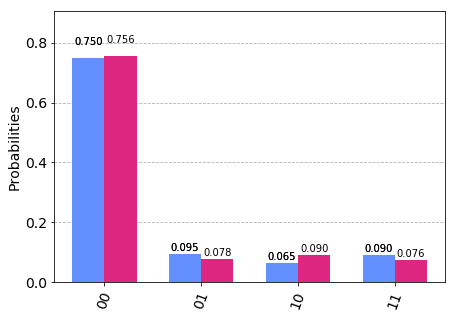

In [22]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.ry(-m.acos((1+m.sqrt(5))/m.sqrt(12))*2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ry(m.atan(m.sqrt(5)-2)*2, qreg_q[0])
circuit.ry(m.atan(m.sqrt(5)-2)*2, qreg_q[1])

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)])

Задание 6:

\begin{equation}
|\Psi \rangle_n=\sum_x \alpha_x |x\rangle_m |\Phi_x\rangle_{n-m}
\end{equation}

После измерения первых m кубитов с вероятностью $|\alpha_x|^2$ получим состояние $|x\rangle_m |\Phi_x\rangle_{n-m}$.

\begin{equation}
|\Phi_x\rangle_{n-m}=\sum_y \beta_y |y\rangle_k |\chi_{xy}\rangle_{n-m-k}
\end{equation}

После измерения {m+1,...,m+k} кубитов с вероятностью $|\beta_y|^2$ получим состояние $|x\rangle_m |y\rangle_k |\chi_{xy}\rangle_{n-m-k}$. По итогам двух измерений вероятность получить состояние равна $|\alpha_x|^2|\beta_y|^2$.

b) Пусть теперь измеряется состояние сразу первых m+k кубитов, раскладываем исходное состояние по состояниям $|xy\rangle$.

\begin{equation}
|\Psi \rangle_n=\sum_{xy} \gamma_{xy} |xy\rangle_{m+k} |\chi_{xy}\rangle_{n-m-k}
\end{equation}

После измерения с вероятностью $|\gamma_{xy}|^2$ получим состояние $|xy\rangle_{m+k} |\chi_{xy}\rangle_{n-m-k}=|x\rangle_m |y\rangle_k |\chi_{xy}\rangle_{n-m-k}$. Поскольку выражение для условной вероятности имеет вид: $p(xy)=p(y|x)p(x)$, имеем, что $|\gamma_{xy}|^2=|\alpha_{x}|^2|\beta_{y}|^2$, т.е. два измерения m и k кубитов дают такой же результат, что и одно измерение первых m+k кубитов.


AttributeError: Attribute get_сounts is not defined